In [70]:
import tensorflow as tf
import numpy as np
from numpy.random import normal
from scipy import stats as stats
import matplotlib.pyplot as plt

In [71]:
f = lambda x: 2*x + 1

np.random.seed(42)
Xs = np.random.uniform(-10, 10, 50)
Ys = f(Xs) + normal(0, 5e-2, len(Xs))
Xs, Ys = Xs.reshape(-1, 1), Ys.reshape(-1, 1)
n_samples = len(Xs)

In [87]:
X  = tf.placeholder(tf.float32, [None, 1])
Y_ = tf.placeholder(tf.float32, [None, 1])
a = tf.Variable(0.0)
b = tf.Variable(0.0)


Y = a*X + b
loss  = (1./(2*n_samples)) * (Y-Y_)**2 

trainer = tf.train.GradientDescentOptimizer(0.01)
train_op = trainer.minimize(loss)
grads_and_vars = trainer.compute_gradients(loss, [a, b])
optimize = trainer.apply_gradients(grads_and_vars)
grads_and_vars = tf.Print(grads_and_vars, [grads_and_vars], 'Status:')



Values a,b for iteration 0: 0.00000 , 0.00000
Values a,b for iteration 1000: 1.41692 , 0.86892
Values a,b for iteration 2000: 1.77852 , 1.08580
Values a,b for iteration 3000: 1.87240 , 1.13741
Values a,b for iteration 4000: 1.89822 , 1.14715
Values a,b for iteration 5000: 1.90677 , 1.14640


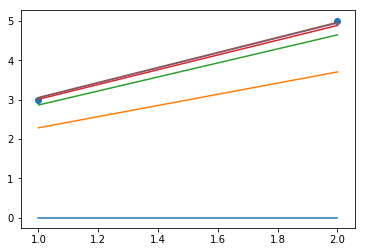

In [93]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    X_data = np.array([1,2]).reshape((-1, 1))
    Y_data = np.array([3,5]).reshape((-1, 1))
    plt.scatter(X_data, Y_data, marker='o')
    for i in range(5001):
        val_loss, _, val_a,val_b = sess.run([loss, train_op, a,b], 
                                      feed_dict={X: X_data, Y_: Y_data})
        if i % 1000 == 0:
            print("Values a,b for iteration {0}: {1:.5f} , {2:.5f}".format(i, val_a, val_b))
            plt.plot(X_data, val_a*X_data + val_b, '-')

    plt.show()

a: 0.66667	b: -0.01163	 loss: 66.06854
Computed grads and vals: 
 [[-66.6672821    0.        ]
 [  1.16319108   0.        ]]
Calculated gradients: [[-66.66728973]] 1.1631910800933838

a: 1.94742	b: 0.04371	 loss: 0.46759
Computed grads and vals: 
 [[-1.08853042  1.93652976]
 [-0.89646614  0.03474205]]
Calculated gradients: [[-1.08853042]] -0.8964660167694092

a: 1.97060	b: 0.13136	 loss: 0.37178
Computed grads and vals: 
 [[-0.04456513  1.97015464]
 [-0.84465766  0.12291657]]
Calculated gradients: [[-0.044565]] -0.8446576595306396

a: 1.97356	b: 0.21152	 loss: 0.30645
Computed grads and vals: 
 [[-0.02546893  1.97330141]
 [-0.76713163  0.20384601]]
Calculated gradients: [[-0.02546882]] -0.7671316266059875

a: 1.97595	b: 0.28428	 loss: 0.25264
Computed grads and vals: 
 [[-0.02288158  1.97572279]
 [-0.69628191  0.27731451]]
Calculated gradients: [[-0.02288154]] -0.6962818503379822

a: 1.97812	b: 0.35032	 loss: 0.20830
Computed grads and vals: 
 [[-0.02076271  1.97791374]
 [-0.63196868  

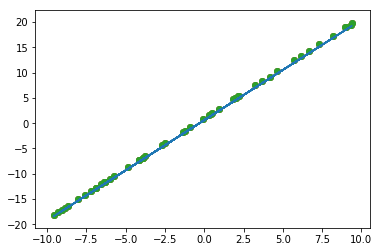

In [97]:
# calculating gradients for a and b
d_a = (1/n_samples) * tf.matmul(Y-Y_,  X, transpose_a=True)
d_b = (1/n_samples) * tf.reduce_sum(Y-Y_)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.scatter(Xs, Ys, marker='o')

    for i in range(100):
        val_loss, val_grads, da, db = sess.run([loss, grads_and_vars, d_a, d_b], feed_dict={X: Xs, Y_: Ys})
        sess.run(train_op, feed_dict={X: Xs, Y_: Ys})
        val_a, val_b= sess.run([a, b], feed_dict={X: Xs, Y_: Ys})
        
        if i% 10 == 0: 
            print("a: {0:.5f}\tb: {1:.5f}\t loss: {2:.5f}".format(val_a, val_b, val_loss.sum()))
            print("Computed grads and vals: \n {0}".format(val_grads))
            print("Calculated gradients: {0} {1}\n".format(da, db))

    plt.plot(Xs, val_a*Xs + val_b, '-')
    plt.show()